In [1]:
#Импорт библиотек и модулей
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
#Загрузка датасета
mnist = fetch_openml('mnist_784')
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


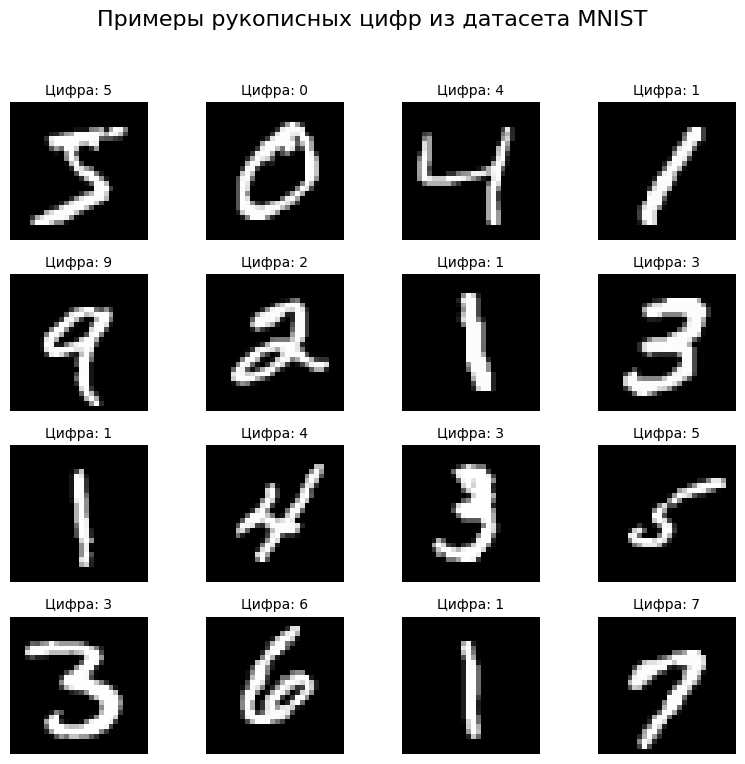

In [3]:
#Визуализация примеров цифр из датасета
images = mnist.data.to_numpy()
num_samples = 16

plt.figure(figsize=(8, 8))
plt.suptitle('Примеры рукописных цифр из датасета MNIST', fontsize=16)
for i in range(num_samples):
        plt.subplot(4, 4, i + 1)
        plt.imshow((images[i].reshape(28,28)), cmap='gray')
        plt.title(f'Цифра: {mnist.target[i]}', fontsize=10)
        plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_4956\887009119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=mnist.target, palette='viridis')


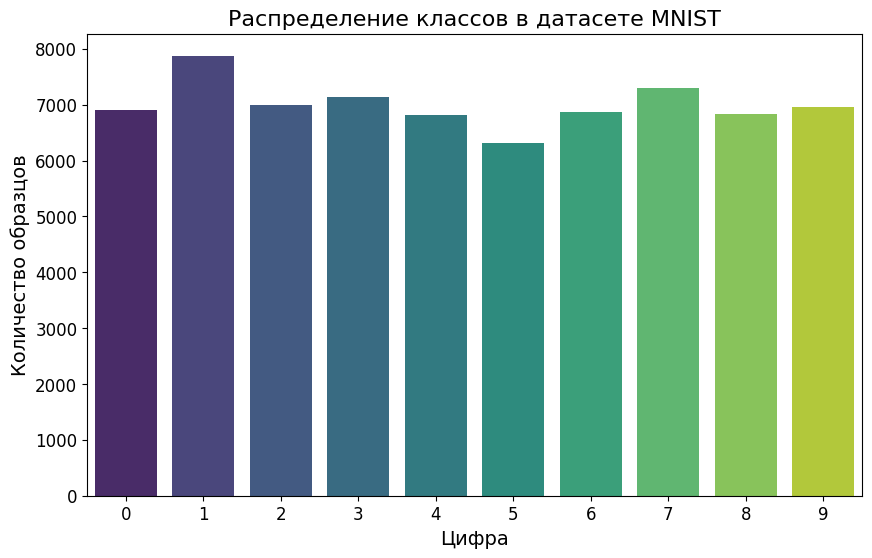

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [6]:
#Распределение классов 
plt.figure(figsize=(10, 6))
sns.countplot(x=mnist.target, palette='viridis')
plt.title('Распределение классов в датасете MNIST', fontsize=16)
plt.xlabel('Цифра', fontsize=14)
plt.ylabel('Количество образцов', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Кол-во значений в класссах целевой переменной
mnist.target.value_counts()

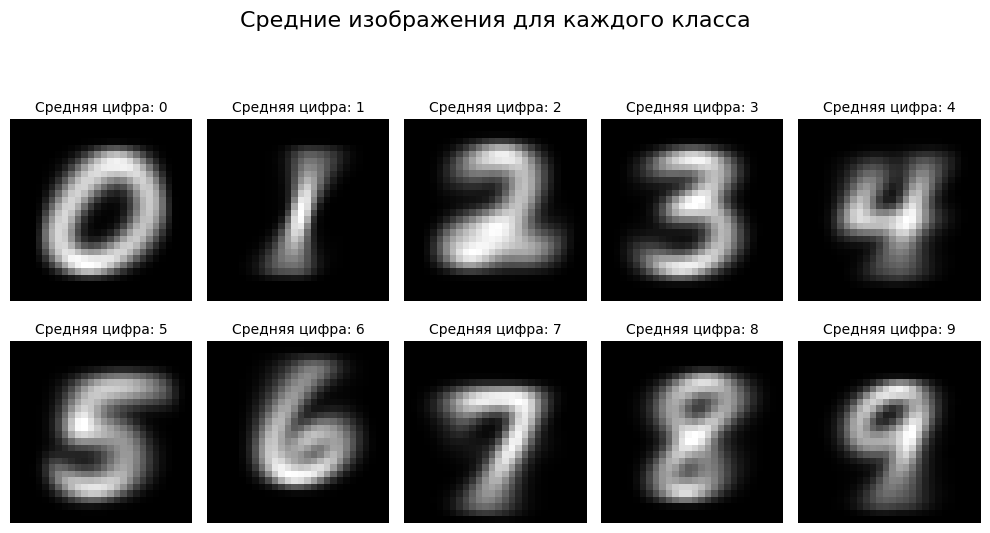

In [5]:
#Средние изображения для каждого класса
def plot_average_images(images, labels, num_classes=10):
    average_images = []
    for i in range(num_classes):
        average = images[labels == str(i)].mean(axis=0)
        average_images.append(average)

    plt.figure(figsize=(10, 6))
    plt.suptitle('Средние изображения для каждого класса', fontsize=16)
    for i, avg_img in enumerate(average_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow((avg_img.reshape(28,28)), cmap='gray')
        plt.title(f'Средняя цифра: {i}', fontsize=10)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_average_images(images, mnist.target)